In [4]:
# Importing necessary libraries and modules
import os
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from utils import nothern_africa
from matplotlib import image 
import matplotlib.pyplot as plt

In [5]:
# Load data
cases = pd.read_csv("./data/covid/africa_daily_time_series_cases.csv")
deaths = pd.read_csv("./data/covid/africa_daily_time_series_deaths.csv")
recoveries = pd.read_csv("./data/covid/africa_daily_time_series_recovered.csv")

In [6]:
# cases[(cases.iloc[:, 3:13].columns > 0).any(axis=1)]
first_month_cases = cases.loc[:, cases.iloc[:,3:13].columns.values]
first_month_cases[(first_month_cases > 0).all(1)]



,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20


In [7]:
dates = pd.to_datetime(cases.iloc[:, 3:,].columns.values).to_series()
month_end_dates = dates.groupby(dates.index.month).apply(lambda x: x.index.max())
month_end_dates = month_end_dates.apply(lambda x: x.strftime('%-m/%d/%y')).to_numpy()
# pd.to_datetime(month_end_dates, format='%d/%m/%Y')

ValueError: Invalid format string

In [ ]:
selected_columns = np.insert(month_end_dates, 0, ['Country/Region'])
month_end_stats =  cases[selected_columns]
month_end_stats['TotalCases'] =  month_end_stats.apply(lambda x: x[month_end_dates].sum(), axis=1)
month_end_stats['TotalDeaths'] =  deaths.apply(lambda x: x[month_end_dates].sum(), axis=1)
month_end_stats['TotalRecoveries'] =  recoveries.apply(lambda x: x[month_end_dates].sum(), axis=1)
month_end_stats.plot.bar(x='Country/Region', y=['TotalCases', 'TotalDeaths', 'TotalRecoveries'])





In [ ]:
neighbour_countries = ['Zambia', 'Mozambique', 'Tanzania', 'Zimbabwe']
neighbours = cases[cases['Country/Region'].isin(neighbour_countries)].iloc[:,3:,]
neighbours = cases[cases['Country/Region'].isin(neighbour_countries)].iloc[:,3:,]
neighbours['TotalCases'] = neighbours.apply(lambda x: x.sum(), axis=1)
neighbours['TotalDeaths'] = deaths[deaths['Country/Region'].isin(neighbour_countries)].iloc[:,3:,].apply(lambda x: x.sum(), axis=1)
neighbours['TotalRecoveries'] = recoveries[recoveries['Country/Region'].isin(neighbour_countries)].iloc[:,3:,].apply(lambda x: x.sum(), axis=1)
neighbours.insert(0, column='Country/Region', value=cases['Country/Region'])
neighbours.plot.bar(x='Country/Region', y=['TotalCases', 'TotalDeaths', 'TotalRecoveries'])



(-23.5418, 57.5, -30.5595, 34.0)


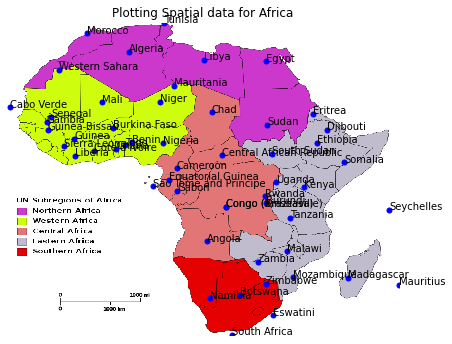

In [15]:
map = plt.imread('./data/covid/AfricaRegions.png')
cordinates = (cases.Long.min() - 0.5, cases.Long.max(), cases.Lat.min(), cases.Lat.max())
print(cordinates)
fig, ax = plt.subplots(figsize=(15 ,15))
ax.scatter(cases.Long, cases.Lat, zorder=2, c='b', s=25)
for idx, row in cases.iterrows():
    ax.text(row.Long, row.Lat, row['Country/Region'])
    # ax.text(row.Long, row.Lat, 'Cases: '+ str(row[3:,].sum() / 4))
ax.axis('off')
ax.set_title('Plotting Spatial data for Africa')
ax.set_xlim(cordinates[0],cordinates[1])
ax.set_ylim(cordinates[2],cordinates[3])
ax.imshow(map, zorder=0, extent=cordinates, aspect="equal", interpolation='nearest')